# Trabalho Inferencia Estatistica!!

* Ian de Holanda Cavalcanti Bezerra - 13835412
* Hiago Vinicius Am√©rico - 11218469
* Nina Cunha Pinheiro - 13686500
* Bruna Romero Arraes 11913896

Escolhemos como DataSet o "Students' Social Media Addiction", pois ele apresenta um tema presente para o cotidiano de todo jovem. V√≠cio em redes sociais √© uma das maiores realidades presentes no cotidiano do jovem moderno, muitos, n√£o t√™m muitas mem√≥rias de um tempo onde celulares e redes sociais n√£o existiam.
 
Usamos este DataSet que apresenta dados qualitativos e quantitativos para realizar um estudo e entender melhor quais s√£o os efeitos do uso dessas redes sociais em situa√ß√µes de v√≠cio e n√£o-v√≠cio para diversos fatores que v√£o desde vida social at√© performance acad√™mica.

Buscamos fazer an√°lises de infer√™ncia estat√≠stica para demonstrar os conhecimentos adquiridos durante o semestre de forma pr√°tica. Visamos tamb√©m, pelo decorrer desta pr√°tica, criar uma atividade did√°tica com que o leitor do c√≥digo n√£o veja apenas resultados, mas sim possa acompanhar e aprender mais sobre estas ferramentas estat√≠sticas.

# ________________________________________________

### Carregando o DataSet Usando Pandas

Pandas √© uma ferramenta revolucion√°ria para √°reas como ci√™ncia de dados e estat√≠stica, ele permite a manipula√ß√£o de dados de forma f√°cil e eficiente. Seu sucesso e popularidade criou uma plataforma unificada para a integra√ß√£o de dataframes (estrutura de dado fundamental do Pandas) com outras bibliotecas de Python como NumPy e SciPy (matem√°tica), Matplotlib e Seaborn (visualiza√ß√£o). As implementa√ß√µes de kernels em linguagens eficientes como C presentes nestas bibliotecas permitem que a simplicidade de sintaxe e abstra√ß√£o fornecida por uma linguagem de alto n√≠vel como Python seja usada juntamente com a velocidade de uma linguagem de baixo n√≠vel.
 
Com isso vamos carregar o Dataset baixado no Kaggle (plataforma de compartilhamento de datasets).
 
https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships?resource=download
 
Carregamos a tabela CSV em um DataFrame de Pandas e usamos pandas.head() para visualizar algumas informa√ß√µes b√°sicas. 
 
O DataFrame √© uma estrutura de dados conceitualmente muito parecida a uma tabela de Excel, ela utiliza tabelas para a organiza√ß√£o e armazenamento desses dados, dentro dos slots podemos armazenar qualquer forma de objeto que achamos no cotidiano do Python: Listas, Int, Float, String. 
 
Chamamos uma certa linha e coluna de uma tabela de um DataPoint. Podemos estudar e visualizar estes datapoints em busca de diversas informa√ß√µes escondidas neles, buscamos entender fatores presentes nos valores e distribui√ß√£o desses pontos como vari√¢ncia, m√©dia, desvio padr√£o, outliers e etc.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for prettier plots
plt.style.use('default')
sns.set_palette("husl")

# Load the correct CSV file
df = pd.read_csv('../Data/Students_Social.csv')

# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Dataset Shape: (705, 13)

First 5 rows:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score

## Primeiras Visualiza√ß√µes e An√°lise Explorat√≥ria de Dados
 
Para a realiza√ß√£o bem sucedida de an√°lises estat√≠sticas, sejam estes testes de m√©dia, testes de vari√¢ncia, ou at√© modelos de regress√£o linear, precisamos ter um bom entendimento do que nossos dados se tratam. Assim podemos criar hip√≥teses a serem testadas, ou buscar poss√≠veis padr√µes a serem aprendidos. 
 
Usamos o poder das visualiza√ß√µes (Plots) para realizar esta tarefa, por meio dessas visualiza√ß√µes podemos criar no√ß√µes b√°sicas sobre o padr√£o de distribui√ß√£o desses datapoints assim como a qualidade e extens√£o dos dados dispon√≠veis. 

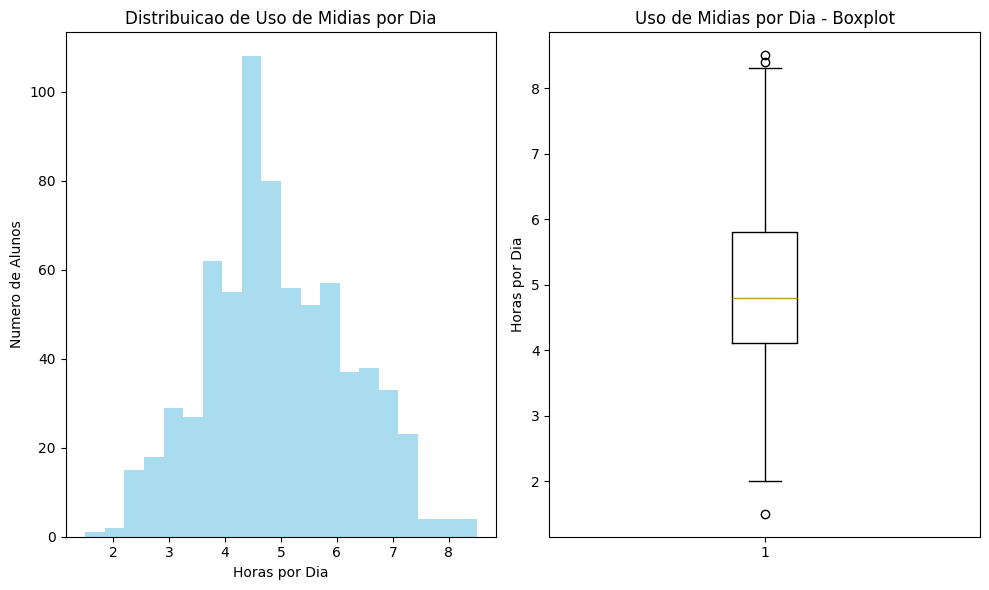

Media de Uso de Midias por Dia: 4.92 horas
Maximo de Uso de Midias por Dia: 8.50 horas


In [21]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Avg_Daily_Usage_Hours'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribuicao de Uso de Midias por Dia')
plt.xlabel('Horas por Dia')
plt.ylabel('Numero de Alunos')

plt.subplot(1, 2, 2)
plt.boxplot(df['Avg_Daily_Usage_Hours'])
plt.title('Uso de Midias por Dia - Boxplot')
plt.ylabel('Horas por Dia')

plt.tight_layout()
plt.show()

print(f"Media de Uso de Midias por Dia: {df['Avg_Daily_Usage_Hours'].mean():.2f} horas")
print(f"Maximo de Uso de Midias por Dia: {df['Avg_Daily_Usage_Hours'].max():.2f} horas")


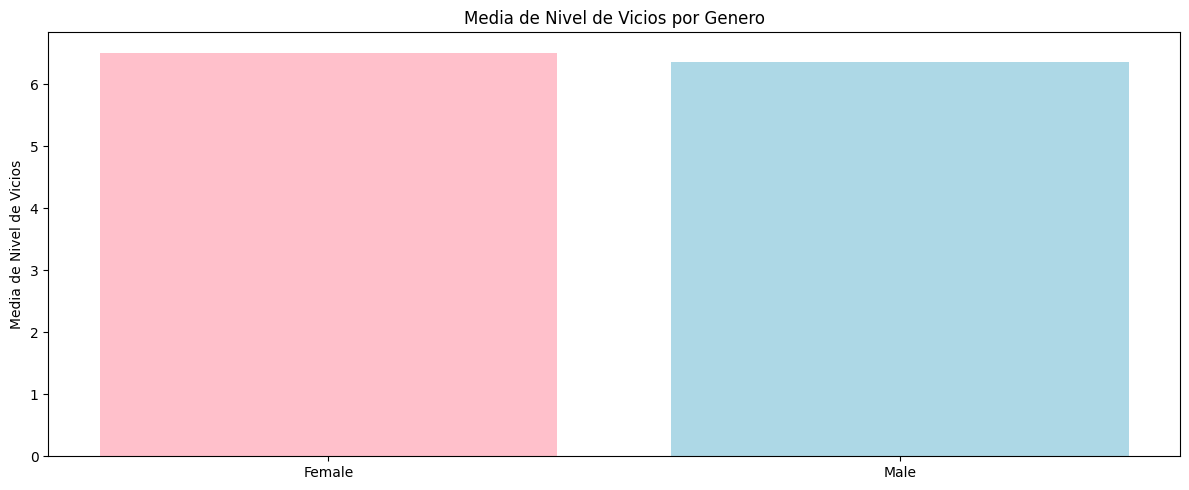

Nivel de Vicios por Genero:
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
Female  353.0  6.515581  1.709070  3.0  5.0  7.0  8.0  9.0
Male    352.0  6.357955  1.452866  2.0  5.0  7.0  7.0  9.0


In [20]:
plt.figure(figsize=(12, 5))

gender_addiction = df.groupby('Gender')['Addicted_Score'].mean()
plt.bar(gender_addiction.index, gender_addiction.values, color=['pink', 'lightblue'])
plt.title('Media de Nivel de Vicios por Genero')
plt.ylabel('Media de Nivel de Vicios')

plt.tight_layout()
plt.show()

print("Nivel de Vicios por Genero:")
print(df.groupby('Gender')['Addicted_Score'].describe())


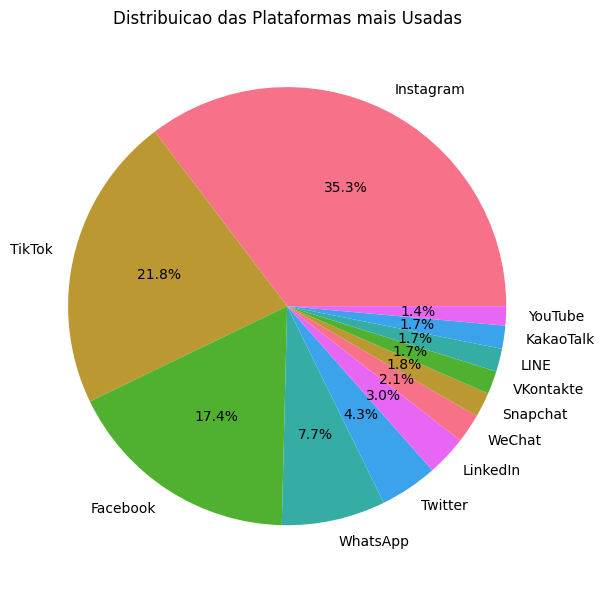

Estatisticas de uso das plataformas:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


In [18]:
plt.figure(figsize=(12, 6))

platform_counts = df['Most_Used_Platform'].value_counts()
plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Distribuicao das Plataformas mais Usadas')

plt.tight_layout()
plt.show()

print("Estatisticas de uso das plataformas:")
print(platform_counts)


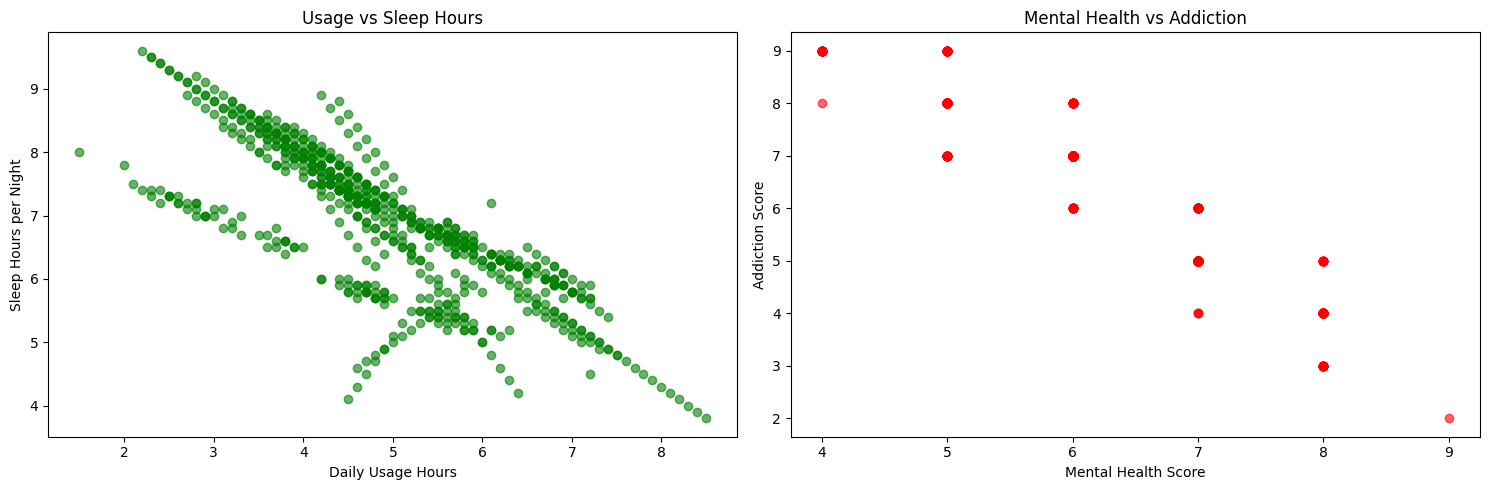

Correlacoes:
Uso de Midias vs Sono: -0.791
Saude Mental vs Nivel de Vicios: -0.945


In [ ]:
plt.figure(figsize=(15, 5))

# Uso de Midias vs Sono
plt.subplot(1, 2, 1)
plt.scatter(df['Avg_Daily_Usage_Hours'], df['Sleep_Hours_Per_Night'], alpha=0.6, color='green')
plt.xlabel('Uso de Midias')
plt.ylabel('Sono')
plt.title('Uso de Midias vs Sono')

# Mental Health vs Nivel de Vicios
plt.subplot(1, 2, 2)
plt.scatter(df['Mental_Health_Score'], df['Addicted_Score'], alpha=0.6, color='red')
plt.xlabel('Saude Mental')
plt.ylabel('Nivel de Vicios')
plt.title('Saude Mental vs Nivel de Vicios')

plt.tight_layout()
plt.show()

# Correlacoes
print("Correlacoes:")
print(f"Uso de Midias vs Sono: {df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night']):.3f}")
print(f"Saude Mental vs Nivel de Vicios: {df['Mental_Health_Score'].corr(df['Addicted_Score']):.3f}")


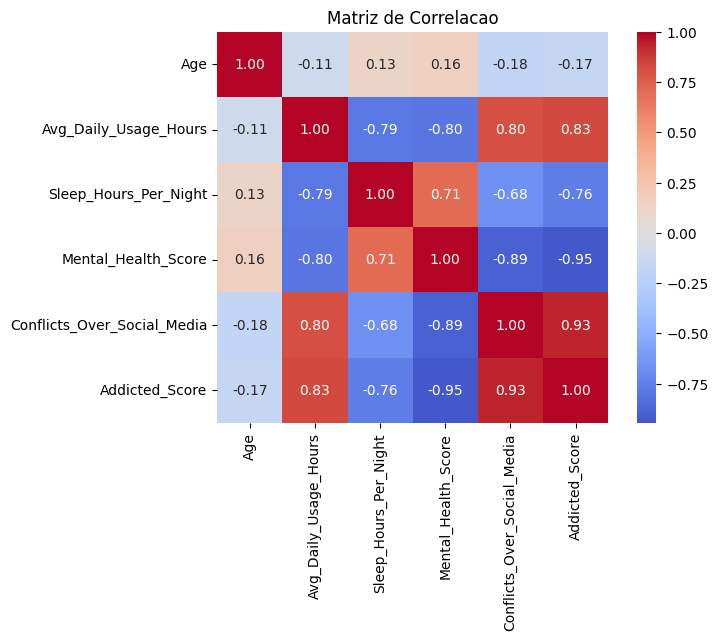


üéØ Key Insights:
‚Ä¢ 64.3% of students report academic performance impact
‚Ä¢ Average addiction score: 6.4/10
‚Ä¢ Students sleep an average of 6.9 hours per night


In [13]:
plt.figure(figsize=(14, 6))

# Correlacao entre as variaveis numericas
plt.subplot(1, 2, 2)
numerical_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                  'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Matriz de Correlacao')

plt.tight_layout()
plt.show()


print("\nüéØ Insights:")
print(f"‚Ä¢ {academic_impact['Yes']/(academic_impact['Yes']+academic_impact['No'])*100:.1f}% de alunos reportam impacto na performance academica")
print(f"‚Ä¢ Media de nivel de vicios: {df['Addicted_Score'].mean():.1f}/10")
print(f"‚Ä¢ Alunos dormem em media de {df['Sleep_Hours_Per_Night'].mean():.1f} horas por noite")


## O que podemos tirar dessa an√°lise inicial?

Observamos de forma visual que h√° sim influ√™ncia (Correla√ß√£o) entre os fatores. Em algumas visualiza√ß√µes estas caracter√≠sticas ficam bem claras, quando observamos o plot de horas de sono vs horas de uso de m√≠dias sociais vemos que claramente n√£o h√° uma distribui√ß√£o aleat√≥ria, e existe sim uma rela√ß√£o entre estes fatores. An√°lises pr√©vias como estas nos possibilitam criar hip√≥teses com maior rigor do que apenas existe ou n√£o existe correla√ß√£o. 

Seguindo adiante vamos expandir estas hip√≥teses e por meio da infer√™ncia estat√≠stica analisar se estas est√£o certas ou n√£o. Devemos sempre lembrar que estamos buscando, por meio de dados coletados de um grupo de pessoas, entender e generalizar o comportamento da sociedade como um todo. Buscamos identificar padr√µes dentro desta amostra e esperamos que eles possam ser refletidos para a popula√ß√£o em geral.

# ____________________________________________________\

## Teste Qui-Quadrado

O teste qui-quadrado √© uma ferramenta fundamental da infer√™ncia estat√≠stica que nos permite investigar se existe associa√ß√£o significativa entre duas vari√°veis categ√≥ricas. Esta t√©cnica √© especialmente valiosa quando trabalhamos com dados qualitativos, como g√™nero, prefer√™ncias, status de relacionamento, ou qualquer vari√°vel que possa ser classificada em categorias distintas.

O princ√≠pio por tr√°s do teste qui-quadrado baseia-se na compara√ß√£o entre as frequ√™ncias observadas em nossa amostra e as frequ√™ncias que esperar√≠amos encontrar se n√£o houvesse associa√ß√£o entre as vari√°veis (hip√≥tese nula). Quando essas diferen√ßas s√£o grandes o suficiente, podemos concluir estatisticamente que existe uma associa√ß√£o real entre as vari√°veis na popula√ß√£o.

Este teste √© extremamente √∫til em nosso contexto de an√°lise de v√≠cio em redes sociais, pois muitas das vari√°veis em nosso dataset s√£o categ√≥ricas: g√™nero, n√≠vel acad√™mico, status de relacionamento, plataforma mais usada, e at√© mesmo se h√° impacto na performance acad√™mica. Por meio do teste qui-quadrado, podemos verificar cientificamente se vari√°veis como g√™nero t√™m associa√ß√£o com o impacto nas notas, ou se o status de relacionamento est√° relacionado com conflitos por causa das redes sociais.

A implementa√ß√£o do teste qui-quadrado em Python √© facilitada pela biblioteca SciPy, que integra perfeitamente com nossos DataFrames do Pandas, permitindo an√°lises estat√≠sticas robustas com poucas linhas de c√≥digo.


# ____________________________________________________\


## Prepara√ß√£o dos Dados e Metodologia do Teste

**Problema da Categoriza√ß√£o:**
Para aplicar o teste qui-quadrado, precisamos de duas vari√°veis categ√≥ricas. Temos `Affects_Academic_Performance` (Sim/N√£o) como vari√°vel categ√≥rica, mas `Avg_Daily_Usage_Hours` √© uma vari√°vel cont√≠nua (valores num√©ricos de 0 a 8.5 horas). Por isso, precisamos transformar as horas de uso em categorias.

**Como Criamos os Grupos:**
Utilizamos uma abordagem baseada em **percentis** para dividir os estudantes em tr√™s grupos equilibrados:
- **Baixo Uso**: estudantes no ter√ßo inferior (33% menores valores)
- **Uso Moderado**: estudantes no ter√ßo intermedi√°rio (33% valores m√©dios)  
- **Alto Uso**: estudantes no ter√ßo superior (33% maiores valores)

Esta divis√£o garante que cada grupo tenha aproximadamente o mesmo n√∫mero de estudantes, evitando grupos muito pequenos que poderiam comprometer a validade do teste.

**O que Estamos Testando:**
Queremos verificar se existe uma **associa√ß√£o sistem√°tica** entre o n√≠vel de uso de m√≠dias sociais e o relato de impacto na performance acad√™mica. Especificamente:
- Ser√° que estudantes com alto uso reportam mais frequentemente impacto negativo nas notas?
- Esta diferen√ßa √© estatisticamente significativa ou pode ser apenas casualidade?

**Como o Qui-Quadrado Funciona:**
O teste compara as **frequ√™ncias observadas** (o que realmente encontramos na amostra) com as **frequ√™ncias esperadas** (o que esperar√≠amos se n√£o houvesse associa√ß√£o). Se a diferen√ßa for grande o suficiente, conclu√≠mos que existe associa√ß√£o real na popula√ß√£o. O c√°lculo considera:

1. **Hip√≥tese Nula (H‚ÇÄ):** Uso de m√≠dias e impacto acad√™mico s√£o independentes
2. **Estat√≠stica œá¬≤:** Mede o quanto os dados observados se desviam do esperado sob H‚ÇÄ
3. **Valor-p:** Probabilidade de obter resultados t√£o extremos quanto os observados, assumindo H‚ÇÄ verdadeira


In [8]:
from scipy.stats import chi2_contingency
import numpy as np

# Exemplo pr√°tico: Teste qui-quadrado entre Horas de Uso de M√≠dias Sociais e Impacto na Performance Acad√™mica
print("=== TESTE QUI-QUADRADO: Uso de M√≠dias Sociais vs Impacto na Performance Acad√™mica ===\n")

# Vamos criar categorias baseadas em quartis para ter uma distribui√ß√£o equilibrada
quartiles = df['Avg_Daily_Usage_Hours'].quantile([0.33, 0.67])
print("Distribui√ß√£o das horas de uso:")
print(f"Q1 (33%): {quartiles[0.33]:.1f} horas")
print(f"Q2 (67%): {quartiles[0.67]:.1f} horas")
print()

# Categorizando as horas de uso
def categorize_usage(hours):
    if hours <= quartiles[0.33]:
        return 'Baixo Uso'
    elif hours <= quartiles[0.67]:
        return 'Uso Moderado' 
    else:
        return 'Alto Uso'

df['Usage_Category'] = df['Avg_Daily_Usage_Hours'].apply(categorize_usage)

# Verificando a distribui√ß√£o das categorias
print("Distribui√ß√£o por categoria de uso:")
print(df['Usage_Category'].value_counts())
print()

# Criando a tabela de conting√™ncia
contingency_table = pd.crosstab(df['Usage_Category'], df['Affects_Academic_Performance'])
print("Tabela de Conting√™ncia:")
print(contingency_table)
print()

# Realizando o teste qui-quadrado
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("Resultados do Teste Qui-Quadrado:")
print(f"Estat√≠stica Qui-quadrado: {chi2_stat:.4f}")
print(f"Valor-p: {p_value}")
print(f"Graus de liberdade: {dof}")
print()



=== TESTE QUI-QUADRADO: Uso de M√≠dias Sociais vs Impacto na Performance Acad√™mica ===

Distribui√ß√£o das horas de uso:
Q1 (33%): 4.4 horas
Q2 (67%): 5.5 horas

Distribui√ß√£o por categoria de uso:
Usage_Category
Baixo Uso       259
Uso Moderado    227
Alto Uso        219
Name: count, dtype: int64

Tabela de Conting√™ncia:
Affects_Academic_Performance   No  Yes
Usage_Category                        
Alto Uso                        0  219
Baixo Uso                     191   68
Uso Moderado                   61  166

Resultados do Teste Qui-Quadrado:
Estat√≠stica Qui-quadrado: 292.4468
Valor-p: 3.1332497373356823e-64
Graus de liberdade: 2



In [7]:
# Interpreta√ß√£o dos resultados
alpha = 0.10

print(f"N√≠vel de signific√¢ncia (Œ±): {alpha}")
if p_value < alpha:
    print("‚úÖ CONCLUS√ÉO: Rejeitamos a hip√≥tese nula")
    print("   Existe associa√ß√£o significativa entre Uso de M√≠dias Sociais e Impacto na Performance Acad√™mica")
else:
    print("‚ùå CONCLUS√ÉO: N√£o rejeitamos a hip√≥tese nula")
    print("   N√£o h√° evid√™ncia suficiente de associa√ß√£o entre Uso de M√≠dias Sociais e Impacto na Performance Acad√™mica")

print()
print("Frequ√™ncias Esperadas (sob hip√≥tese nula):")
expected_df = pd.DataFrame(expected_freq, 
                          index=contingency_table.index, 
                          columns=contingency_table.columns)
print(expected_df.round(2))

N√≠vel de signific√¢ncia (Œ±): 0.1
‚úÖ CONCLUS√ÉO: Rejeitamos a hip√≥tese nula
   Existe associa√ß√£o significativa entre Uso de M√≠dias Sociais e Impacto na Performance Acad√™mica

Frequ√™ncias Esperadas (sob hip√≥tese nula):
Affects_Academic_Performance     No     Yes
Usage_Category                             
Alto Uso                      78.28  140.72
Baixo Uso                     92.58  166.42
Uso Moderado                  81.14  145.86



# ____________________________________________________
## Interpreta√ß√£o e Aplica√ß√£o do Teste Qui-Quadrado

O exemplo acima demonstra como o teste qui-quadrado nos permite verificar cientificamente se existe uma associa√ß√£o real entre duas vari√°veis categ√≥ricas em nossa popula√ß√£o de interesse. Note que precisamos categorizar a vari√°vel cont√≠nua de horas de uso para aplicar este teste, criando grupos de "Baixo Uso", "Uso Moderado" e "Alto Uso".

**Hip√≥teses Testadas:**
- **H‚ÇÄ (Hip√≥tese Nula):** N√£o existe associa√ß√£o entre categoria de uso de m√≠dias sociais e impacto na performance acad√™mica
- **H‚ÇÅ (Hip√≥tese Alternativa):** Existe associa√ß√£o significativa entre essas vari√°veis

**Como Interpretar os Resultados:**

O **valor-p** foi extremamente pequeno, isso significa que existe uma associa√ß√£o quase perfeita entre uso de m√≠dias sociais e impacto acad√™mico nos dados.
